NAME : KELVIN CHRISTOBER

ROLL NO : 215229120

### Importing

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r"train.csv")

In [3]:
df1=pd.read_csv(r"test.csv")

### Preprocessing & Data Cleaning

In [4]:
df=df.drop(['keyword','location','id'],axis=1)

In [5]:
df1=df1.drop(['keyword','location','id'],axis=1)

In [6]:
df.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
df1.head() 

,text
0,Just happened a terrible car crash
1,"Heard about #earthquake is different cities, s..."
2,"there is a forest fire at spot pond, geese are..."
3,Apocalypse lighting. #Spokane #wildfires
4,Typhoon Soudelor kills 28 in China and Taiwan


In [8]:
import re
import nltk
from nltk.corpus import stopwords

In [9]:
URL_PATTERN = '((http|https)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\.([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*'
all_stopwords = stopwords.words('english')

def process_text(text):
    # remove stopwords
    remove_stop = ' '.join([word for word in text.split() if word not in all_stopwords])
    #remove url
    remove_url = re.sub(URL_PATTERN, '', remove_stop)
    #remove punctuation
    remove_punc = re.sub(r'[^\w\s]', '', remove_url)
    
    return remove_punc.lower()

### Tokenization

In [10]:
import nltk
from nltk import TweetTokenizer

tokenizer = TweetTokenizer()

df['tokens'] = [tokenizer.tokenize(item) for item in df.text]
df1['tokens'] = [tokenizer.tokenize(item) for item in df1.text]

### Lemmatization

In [11]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_item(item):
    new_item = []
    for x in item:
        x = lemmatizer.lemmatize(x)
        new_item.append(x)
    return " ".join(new_item)

df['tokens'] = [lemmatize_item(item) for item in df.tokens]
df1['tokens'] = [lemmatize_item(item) for item in df1.tokens]

### Vectorization

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()


X = vectorizer.fit_transform(df.text).toarray()
y = df['target']

test_texts = vectorizer.transform(df1["text"])

In [13]:
#Checking

df.isnull().sum()

text      0
target    0
tokens    0
dtype: int64

### Model Building

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [15]:
from sklearn.linear_model import SGDClassifier
 
sgd = SGDClassifier(loss='hinge',penalty='l2')

sgd.fit(X_train,y_train)

y_pred = sgd.predict(X_test)

In [16]:
y_pred

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

### EDA

<AxesSubplot:xlabel='target', ylabel='count'>

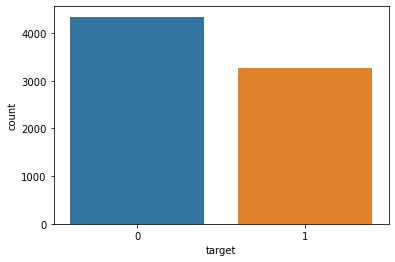

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='target',data=df)

## Metrics

### Confusion matrix

In [18]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[796,  90],
       [204, 433]], dtype=int64)

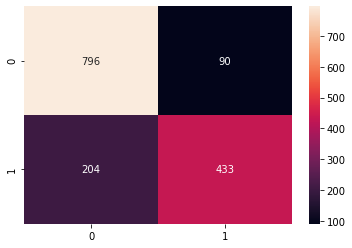

In [19]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='g')
plt.show()

### Classification report

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.84       886
           1       0.83      0.68      0.75       637

    accuracy                           0.81      1523
   macro avg       0.81      0.79      0.80      1523
weighted avg       0.81      0.81      0.80      1523



### Accuracy

In [21]:
from sklearn.metrics import accuracy_score
print('Accuracy: ',accuracy_score(y_test,y_pred))

Accuracy:  0.8069599474720945


### F1 Score

In [22]:
# finding f1_score
from sklearn.metrics import f1_score

print("F1 Score =", f1_score(y_test, y_pred, average='weighted'))

F1 Score = 0.8033085490308991


### Submission file

In [23]:
submission=pd.read_csv('sample_submission.csv')

In [24]:
submission["target"]=sgd.predict(test_texts)
submission[:3]

,id,target
0,0,1
1,2,1
2,3,1


In [25]:
submission.to_csv('s+submission.csv', index=False)

In [26]:
df3=pd.read_csv('s+submission.csv')

In [27]:
df3.shape

(3263, 2)

In [28]:
df3.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
